#**Import Library**

In [ ]:
# Data loading and data analysis
import numpy as np
import pandas as pd
import zipfile
from google.colab import files

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.style.use('seaborn')

# Data preprocessing
from sklearn.preprocessing import MinMaxScaler

# Modeling
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

#**Dataset Information**

In [ ]:
coffee = pd.read_csv('merged_data_cleaned.csv')
coffee.head(5)

,Unnamed: 0,Species,Owner,Country.of.Origin,Farm.Name,Lot.Number,Mill,ICO.Number,Company,Altitude,...,Color,Category.Two.Defects,Expiration,Certification.Body,Certification.Address,Certification.Contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,0,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,1,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,2,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,3,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,4,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


In [ ]:
data = coffee.filter(['Species', 'Country.of.Origin', 'Sweetness', 'Acidity', 'Body'])
data.head(5)

,Species,Country.of.Origin,Sweetness,Acidity,Body
0,Arabica,Ethiopia,10.0,8.75,8.50
1,Arabica,Ethiopia,10.0,8.58,8.42
2,Arabica,Guatemala,10.0,8.42,8.33
3,Arabica,Ethiopia,10.0,8.42,8.50
4,Arabica,Ethiopia,10.0,8.50,8.42


In [ ]:
data.rename(columns=({'Country.of.Origin':'Country_of_Origin'}), inplace=True)
data.head(5)

,Species,Country_of_Origin,Sweetness,Acidity,Body
0,Arabica,Ethiopia,10.0,8.75,8.50
1,Arabica,Ethiopia,10.0,8.58,8.42
2,Arabica,Guatemala,10.0,8.42,8.33
3,Arabica,Ethiopia,10.0,8.42,8.50
4,Arabica,Ethiopia,10.0,8.50,8.42


In [ ]:
print(f'Data consist of {data.shape[1]} columns')
print(f'Each column consists of {data.shape[0]} records')

Data consist of 5 columns
Each column consists of 1339 records


In [ ]:
print('This is a list of categories: ', data.Species.unique())

This is a list of categories:  ['Arabica' 'Robusta']


In [ ]:
print('This is a list of country of origin: ', data.Country_of_Origin.unique())

This is a list of country of origin:  ['Ethiopia' 'Guatemala' 'Brazil' 'Peru' 'United States'
 'United States (Hawaii)' 'Indonesia' 'China' 'Costa Rica' 'Mexico'
 'Uganda' 'Honduras' 'Taiwan' 'Nicaragua' 'Tanzania, United Republic Of'
 'Kenya' 'Thailand' 'Colombia' 'Panama' 'Papua New Guinea' 'El Salvador'
 'Japan' 'Ecuador' 'United States (Puerto Rico)' 'Haiti' 'Burundi'
 'Vietnam' 'Philippines' 'Rwanda' 'Malawi' 'Laos' 'Zambia' 'Myanmar'
 'Mauritius' 'Cote d?Ivoire' nan 'India']


#**Exploratory Data Analysis**

##**Handling Missing Value**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Species            1339 non-null   object 
 1   Country_of_Origin  1338 non-null   object 
 2   Sweetness          1339 non-null   float64
 3   Acidity            1339 non-null   float64
 4   Body               1339 non-null   float64
dtypes: float64(3), object(2)
memory usage: 52.4+ KB


In [ ]:
data.isnull().sum()

Species              0
Country_of_Origin    1
Sweetness            0
Acidity              0
Body                 0
dtype: int64

In [ ]:
data.dropna(how='any',inplace=True)

In [ ]:
print('Jumlah data yang null adalah ', data.isnull().sum().sum(), ' records')

Jumlah data yang null adalah  0  records


##**Data Analysis**

In [ ]:
data[['Sweetness', 'Acidity', 'Body']].describe()

,Sweetness,Acidity,Body
count,1338.000000,1338.000000,1338.000000
mean,9.856584,7.536233,7.517451
std,0.616320,0.379478,0.370198
min,0.000000,0.000000,0.000000
25%,10.000000,7.330000,7.330000
50%,10.000000,7.580000,7.500000
75%,10.000000,7.750000,7.670000
max,10.000000,8.750000,8.580000


In [ ]:
print('This is a list of sweetness: ', data.Sweetness.unique())

This is a list of sweetness:  [10.    9.33  8.67  6.67  8.    6.    1.33  0.    7.83  7.75  7.58  7.92
  7.67  7.5   7.42  8.42  7.08]


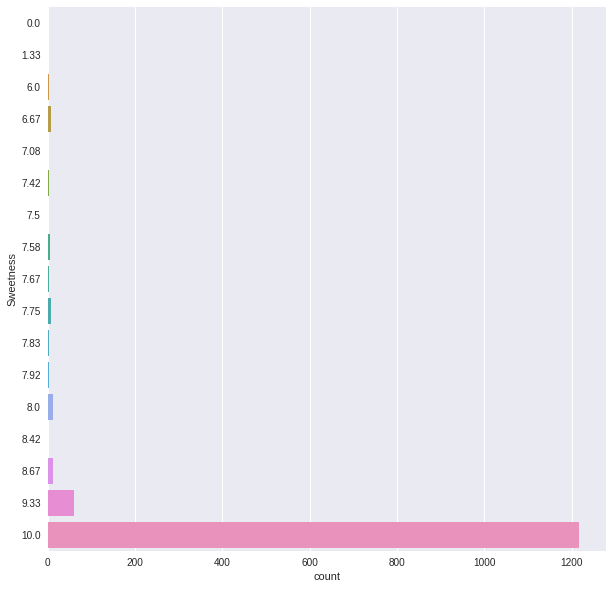

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Sweetness'])
plt.show()

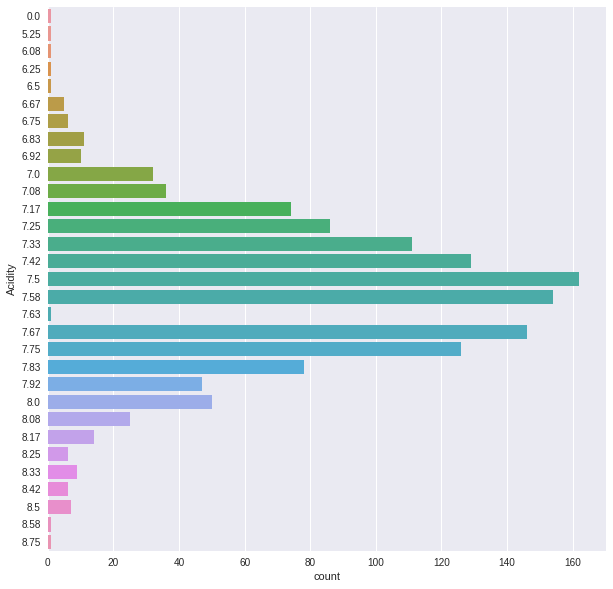

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Acidity'])
plt.show()

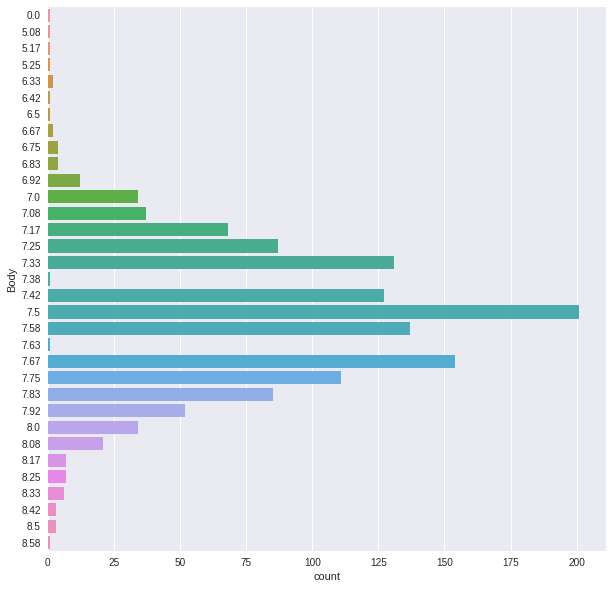

In [ ]:
plt.figure(figsize=(10,10))
sns.countplot(y=data['Body'])
plt.show()